reading the data to visualize and characterize 5 communities of strongly interacting windows in the Hist1 region

In [ ]:
import pandas as pd
df = pd.read_csv('/content/GSE64881_segmentation_at_30000bp.passqc.multibam.csv')
hist_df = pd.read_csv('/content/Hist1_region_features.csv')
df

,chrom,start,stop,F10A2,F10A3,F10A4,F10A5,F10A6,F10B1,F10B2,...,F9F2,F9F3,F9F4,F9F5,F9F6,F9G1,F9G2,F9G3,F9G4,F9G5
0,chr1,0,30000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr1,30000,60000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr1,60000,90000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr1,90000,120000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr1,120000,150000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90872,chr4_random,150000,160594,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90873,chr3_random,0,30000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90874,chr3_random,30000,41899,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90875,chrM,0,16299,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


Extracting Hist1 region

Data frame 2 (df2) has hist1 region of mouse genome

In [ ]:
df2 = df[(df['chrom']=='chr13') & (df['start']>= 21690000) & (df['stop']<= 24120000)]

In [ ]:
lad_data = (hist_df[['LAD']])
hist1_data = (hist_df[['Hist1']])

hist1_data_list = hist_df['Hist1'].values.tolist()
lad_data_list = hist_df['LAD'].values.tolist()


In [ ]:
len(hist1_data_list)


81

In [ ]:
hist_data_total = df2.loc[:, (df2 != 0).any(axis=0)]
hist_data = hist_data_total.drop(["chrom","start","stop"], axis=1)
hist_data

,F10A3,F10A5,F10B3,F10B5,F10C1,F10C3,F10C4,F10D1,F10D5,F10E3,...,F9A4,F9A5,F9B4,F9B6,F9C5,F9D3,F9D6,F9F2,F9F3,F9G3
69714,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
69715,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
69716,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
69717,0,0,0,1,0,1,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0
69718,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69790,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
69791,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0
69792,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,1,1,1,0,0
69793,1,0,0,1,0,1,0,1,0,0,...,0,1,0,0,1,1,1,1,0,0


In [ ]:
count_of_np = hist_data.sum(axis=1)
window_sum_list = list(count_of_np)
windows = len(hist_data.sum(axis=1))
nps = len(hist_data.sum(axis=0))

Finding 5 nodes with largest degree centrality. Each of the 5 nodes is a 'hub' of one community in the network, which consists of hub and its neighbors (nodes directly connected to the hub)

In [ ]:
import numpy as np

rows = windows
cols = windows
sum_avg = 0
sum_count = 0
m_matrix = np.zeros((rows, cols))

for x in range(rows):

  for y in range(x+1, rows):

    m11_count=0

    for z in range(nps):

      if ((hist_data.iat[x,z] == 1) and (hist_data.iat[y,z] == 1)):
        m11_count += 1;
    cosegregation = m11_count/nps
    fa = window_sum_list[x]/nps
    fb = window_sum_list[y]/nps
    linkage = cosegregation - (fa*fb)

    if linkage < 0:
      d_max = min((fa*fb), ((1-fa)*(1-fb)))
      nld = linkage/d_max
    elif  linkage > 0:
       d_max = min((fb*(1-fa)), (fa*(1-fb)))
       nld = linkage/d_max
    else:
      nld = linkage

    m_matrix[x][y] = (nld)
    sum_avg = sum_avg + nld
    sum_count = sum_count + 1
average = sum_avg/sum_count

In [ ]:
for i in range(rows):
    for j in range(i, cols):
        m_matrix[j][i] = m_matrix[i][j]
print(np.matrix(m_matrix))

[[0.         0.7302069  0.65482353 ... 0.24283871 0.2665     0.44114286]
 [0.7302069  0.         0.6514301  ... 0.23354232 0.2276915  0.34834755]
 [0.65482353 0.6514301  0.         ... 0.1847962  0.17078488 0.3230897 ]
 ...
 [0.24283871 0.23354232 0.1847962  ... 0.         0.71903472 0.64718615]
 [0.2665     0.2276915  0.17078488 ... 0.71903472 0.         0.6889313 ]
 [0.44114286 0.34834755 0.3230897  ... 0.64718615 0.6889313  0.        ]]


In [ ]:
degree_centrality_list = []
edge_list = []
edge_matrix = np.zeros((rows, cols))
for a in range(rows):
  edge_count = 0
  for b in range(cols):
    if(m_matrix[a][b]>average):
      edge_matrix [a][b] = 1
      edge_count = edge_count + 1
  edge_list.append(edge_count)
  degree_centrality = edge_count/(cols-1)
  degree_centrality_list.append(degree_centrality)

In [ ]:
edge_matrix

array([[0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 1., 0., ..., 1., 1., 0.]])

In [ ]:
min(degree_centrality_list)

0.0

In [ ]:
max(degree_centrality_list)

0.7375

In [ ]:
from statistics import mean
mean(degree_centrality_list)

0.4904320987654321

In [ ]:
ranked_window_list = np.argsort(degree_centrality_list)
ranked_values = np.sort(degree_centrality_list)

In [ ]:
ranked_window_list

array([44,  6,  3, 76, 79,  1,  2, 75,  4, 78,  0,  5, 74, 70, 77, 71, 80,
        8, 73, 72, 65,  9, 61, 26, 66, 64, 43, 62, 10, 27, 28, 20, 69,  7,
       25, 14, 11, 45, 18, 52, 49, 59, 67, 24, 23, 22, 31, 30, 46, 68, 58,
       21, 33, 55, 42, 29, 54, 53, 50, 16, 36, 51, 47, 34, 13, 63, 40, 12,
       17, 57, 60, 41, 15, 38, 19, 48, 39, 35, 32, 56, 37])

In [ ]:
ranked_values

array([0.    , 0.0875, 0.1125, 0.1625, 0.1625, 0.1875, 0.1875, 0.1875,
       0.2   , 0.2   , 0.2125, 0.2125, 0.2125, 0.2125, 0.225 , 0.2375,
       0.2375, 0.25  , 0.2625, 0.275 , 0.3   , 0.3375, 0.35  , 0.3625,
       0.4   , 0.4125, 0.4375, 0.45  , 0.4875, 0.5   , 0.5   , 0.5125,
       0.525 , 0.525 , 0.5375, 0.55  , 0.55  , 0.5625, 0.5625, 0.575 ,
       0.575 , 0.5875, 0.5875, 0.5875, 0.5875, 0.5875, 0.6   , 0.6   ,
       0.6   , 0.6   , 0.6   , 0.6   , 0.6   , 0.625 , 0.625 , 0.625 ,
       0.625 , 0.6375, 0.6375, 0.6375, 0.6375, 0.65  , 0.65  , 0.65  ,
       0.6625, 0.6625, 0.6625, 0.675 , 0.675 , 0.675 , 0.675 , 0.6875,
       0.6875, 0.6875, 0.6875, 0.7   , 0.7125, 0.7125, 0.7125, 0.7375,
       0.7375])

In [ ]:
hub_list = ranked_window_list[76: ]
hub_list

array([39, 35, 32, 56, 37])

In [ ]:
community_list = []
for i in range (len(hub_list)):
  community_sub_list = []
  for j in range (cols):
    if edge_matrix[hub_list[i]][j]==1:
      community_sub_list.append(j)
  community_sub_list.append(hub_list[i])
  community_list.append(community_sub_list)

List of each community nodes and their size

In [ ]:
print(len(community_list[0]))
print(len(community_list[1]))
print(len(community_list[2]))
print(len(community_list[3]))
print(len(community_list[4]))
print(len(community_list))
print (community_list)

58
58
58
60
60
5
[[0, 2, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 69, 72, 39], [7, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 35], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 67, 68, 32], [7, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 56], [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19

In [ ]:
window_names = hist_data_total[["chrom", "start", "stop"]]
window_names = list(window_names["chrom"] + "-" + window_names["start"].astype(str) + "-" + window_names["stop"].astype(str))
len(window_names)

81

Calculating percentage of nodes in community that contain both Hist1 and LAD genes

In [ ]:
hist_percentages = []
lad_percentages = []
for i in range(len(community_list)):
  hist_count = 0
  lad_count = 0
  for j in community_list[i]:
    if hist1_data_list[j] == 1:
      hist_count = hist_count + 1
    if lad_data_list[j] == 1:
      lad_count = lad_count + 1
  hist_percentage = ((hist_count)/len(community_list[i]))*100
  hist_percentages.append(hist_percentage)
  lad_percentage = ((lad_count)/len(community_list[i]))*100
  lad_percentages.append(lad_percentage)

Percentage of LAD gene in each community


In [ ]:
lad_percentages

[60.3448275862069,
 60.3448275862069,
 60.3448275862069,
 58.333333333333336,
 58.333333333333336]

Percentage of Hist gene in each community


In [ ]:
hist_percentages

[10.344827586206897,
 10.344827586206897,
 5.172413793103448,
 13.333333333333334,
 8.333333333333332]

Visualizing community as heatmap

Each cell in the heatmap represents one edge in the graph

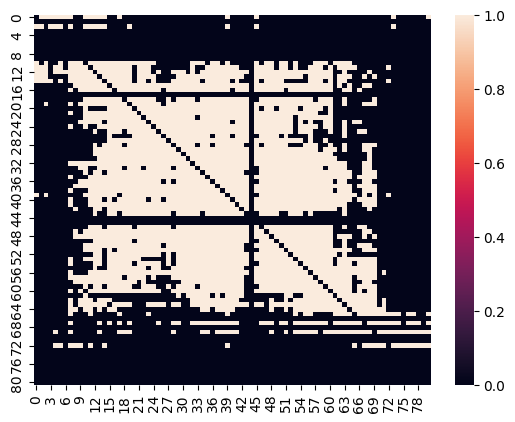

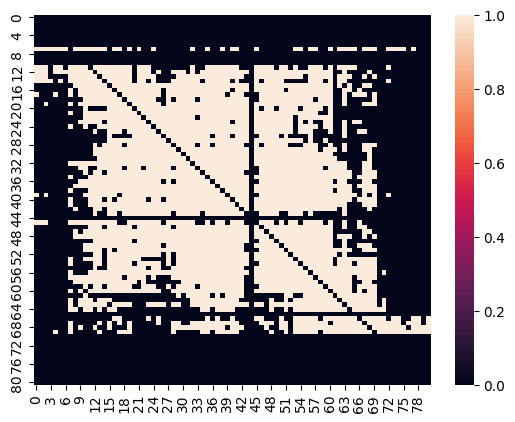

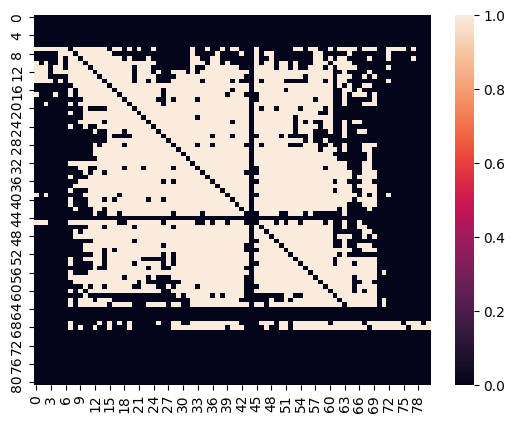

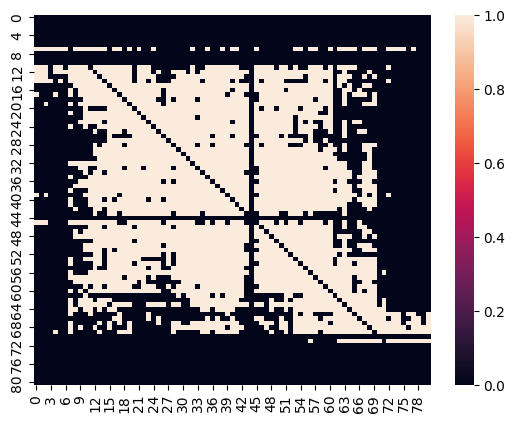

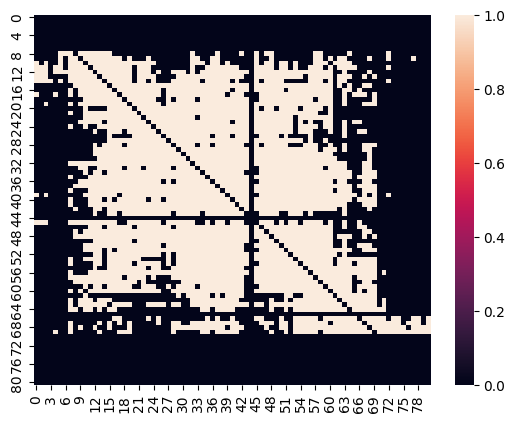

In [ ]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

for i in range(len(hub_list)):
  community_matrix = np.zeros((rows, cols))
  community_matrix[community_list[i]] = edge_matrix[community_list[i]]
  dataplot = sb.heatmap(community_matrix)
  mp.show()